In [23]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

In [24]:
# Load the sales data into a pandas DataFrame
df = pd.read_csv('full_gen_data.csv')

In [25]:
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0


In [26]:
# Check Number of column and column names
print(df.columns)

Index(['country', 'article', 'sales', 'regular_price', 'current_price',
       'ratio', 'retailweek', 'promo1', 'promo2', 'customer_id', 'article.1',
       'productgroup', 'category', 'cost', 'style', 'sizes', 'gender',
       'rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col', 'rgb_r_sec_col',
       'rgb_g_sec_col', 'rgb_b_sec_col', 'label'],
      dtype='object')


"article" refers to a unique identifier for a specific product or item. It is represented by a 6-digit article number.

In [27]:
df.describe()

,sales,regular_price,current_price,ratio,promo1,promo2,customer_id,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,56.781800,52.391200,28.290800,0.545646,0.061900,0.004900,2721.726500,6.517000,161.400000,139.600000,133.500000,207.700000,181.400000,209.900000,0.13928
std,87.934743,35.272128,22.578343,0.194363,0.240975,0.069829,1908.085499,3.914728,39.790147,63.641814,81.148727,35.313205,23.474359,45.306849,0.34624
min,1.000000,3.950000,1.950000,0.296482,0.000000,0.000000,1.000000,1.290000,79.000000,26.000000,0.000000,164.000000,155.000000,155.000000,0.00000
25%,10.000000,25.950000,11.950000,0.354839,0.000000,0.000000,1017.000000,2.290000,138.000000,104.000000,57.000000,164.000000,155.000000,155.000000,0.00000
50%,26.000000,40.950000,20.950000,0.525044,0.000000,0.000000,2091.000000,6.950000,160.000000,144.000000,143.000000,205.000000,187.000000,238.000000,0.00000
75%,64.000000,79.950000,37.950000,0.699248,0.000000,0.000000,4570.250000,9.600000,205.000000,181.000000,205.000000,255.000000,211.000000,255.000000,0.00000
max,898.000000,197.950000,195.950000,1.000000,1.000000,1.000000,5999.000000,13.290000,205.000000,238.000000,250.000000,255.000000,211.000000,255.000000,1.00000


In [28]:
df.shape

(100000, 24)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         100000 non-null  object 
 1   article         100000 non-null  object 
 2   sales           100000 non-null  int64  
 3   regular_price   100000 non-null  float64
 4   current_price   100000 non-null  float64
 5   ratio           100000 non-null  float64
 6   retailweek      100000 non-null  object 
 7   promo1          100000 non-null  int64  
 8   promo2          100000 non-null  int64  
 9   customer_id     100000 non-null  float64
 10  article.1       100000 non-null  object 
 11  productgroup    100000 non-null  object 
 12  category        100000 non-null  object 
 13  cost            100000 non-null  float64
 14  style           100000 non-null  object 
 15  sizes           100000 non-null  object 
 16  gender          100000 non-null  object 
 17  rgb_r_main_

In [30]:
df.isnull().sum()

country           0
article           0
sales             0
regular_price     0
current_price     0
ratio             0
retailweek        0
promo1            0
promo2            0
customer_id       0
article.1         0
productgroup      0
category          0
cost              0
style             0
sizes             0
gender            0
rgb_r_main_col    0
rgb_g_main_col    0
rgb_b_main_col    0
rgb_r_sec_col     0
rgb_g_sec_col     0
rgb_b_sec_col     0
label             0
dtype: int64

In [31]:
# Get descriptive statistics of numerical features
num_features = ['sales', 'regular_price', 'current_price', 'ratio', 'cost']
num_stats = df[num_features].describe()
print(num_stats)

               sales  regular_price  current_price          ratio  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       56.781800      52.391200      28.290800       0.545646   
std        87.934743      35.272128      22.578343       0.194363   
min         1.000000       3.950000       1.950000       0.296482   
25%        10.000000      25.950000      11.950000       0.354839   
50%        26.000000      40.950000      20.950000       0.525044   
75%        64.000000      79.950000      37.950000       0.699248   
max       898.000000     197.950000     195.950000       1.000000   

                cost  
count  100000.000000  
mean        6.517000  
std         3.914728  
min         1.290000  
25%         2.290000  
50%         6.950000  
75%         9.600000  
max        13.290000  


In [32]:
# Get value counts of categorical features
cat_features = ['country', 'promo1', 'promo2', 'productgroup', 'category', 'gender']
for feature in cat_features:
    value_counts = df[feature].value_counts()
    print(f"\nValue counts for {feature}:")
    print(value_counts)


Value counts for country:
Germany    49400
Austria    35140
France     15460
Name: country, dtype: int64

Value counts for promo1:
0    93810
1     6190
Name: promo1, dtype: int64

Value counts for promo2:
0    99510
1      490
Name: promo2, dtype: int64

Value counts for productgroup:
SHOES                   60000
HARDWARE ACCESSORIES    20000
SHORTS                  10000
SWEATSHIRTS             10000
Name: productgroup, dtype: int64

Value counts for category:
TRAINING            30000
RUNNING             20000
FOOTBALL GENERIC    20000
GOLF                10000
RELAX CASUAL        10000
INDOOR              10000
Name: category, dtype: int64

Value counts for gender:
women     70000
kids      10000
unisex    10000
men       10000
Name: gender, dtype: int64


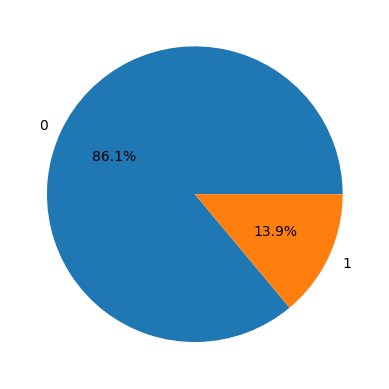

In [195]:
# Create a pie chart of label
label_counts = df['label'].value_counts()
plt.pie(label_counts.values, labels=promo1_counts.index, autopct='%1.1f%%')
plt.title('')
plt.show()

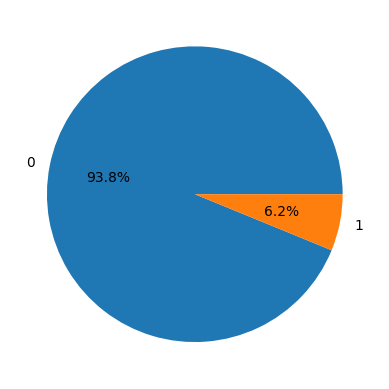

In [59]:
# Create a pie chart of promo1
promo1_counts = df['promo1'].value_counts()
plt.pie(promo1_counts.values, labels=promo1_counts.index, autopct='%1.1f%%')
plt.title('')
plt.show()

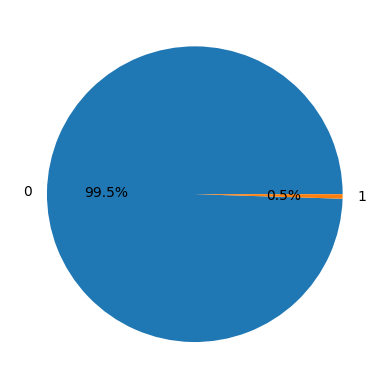

In [60]:
# Create a pie chart of promo2
promo2_counts = df['promo2'].value_counts()
plt.pie(promo2_counts.values, labels=promo1_counts.index, autopct='%1.1f%%')
plt.title('')
plt.show()

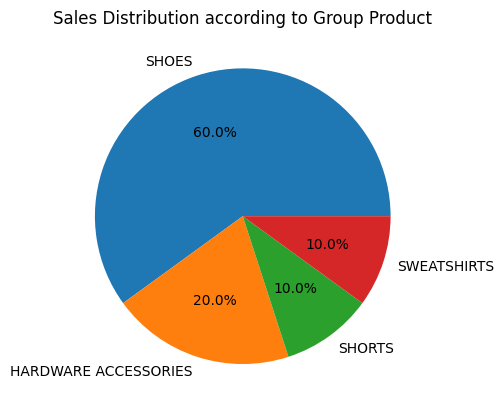

In [69]:
# Create a pie chart of gender
country_counts = df['productgroup'].value_counts()
plt.pie(country_counts.values, labels=country_counts.index, autopct='%1.1f%%')
plt.title('Sales Distribution according to Group Product')
plt.show()

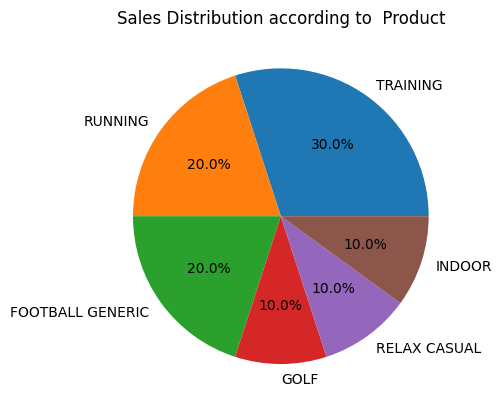

In [71]:
# Create a pie chart of gender
country_counts = df['category'].value_counts()
plt.pie(country_counts.values, labels=country_counts.index, autopct='%1.1f%%')
plt.title('Sales Distribution according to  Product')
plt.show()

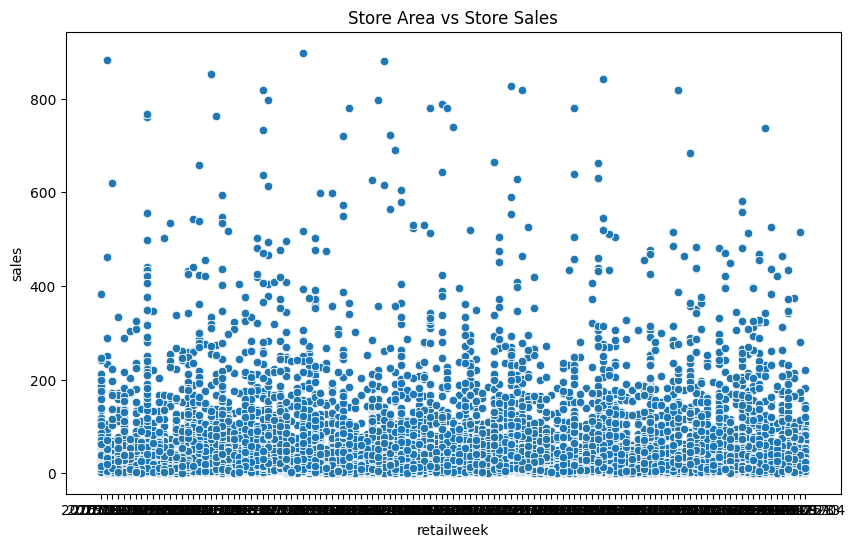

In [33]:
# Create visualizations
plt.figure(figsize=(10, 6))
sns.scatterplot(df, x='retailweek', y='sales')
plt.title('Store Area vs Store Sales')
plt.show()

## What is the most gender interested in our products?

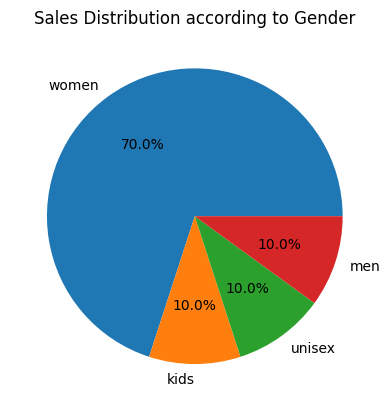

In [58]:
# Create a pie chart of gender
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Sales Distribution according to Gender')
plt.show()

## What is the most country interested in our products?

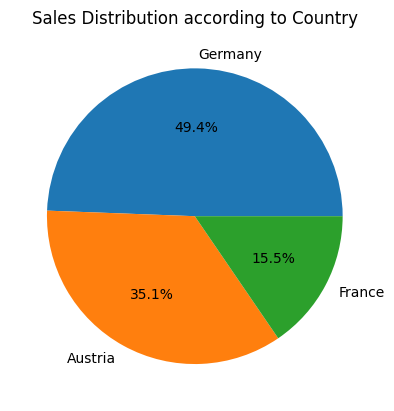

In [62]:
# Create a pie chart of gender
country_counts = df['country'].value_counts()
plt.pie(country_counts.values, labels=country_counts.index, autopct='%1.1f%%')
plt.title('Sales Distribution according to Country')
plt.show()

### Add Month Column

In [34]:
df['month']=df['retailweek'].str[5:7]
df['month'].astype(int)

0        3
1        3
2        3
3        3
4        3
        ..
99995    6
99996    6
99997    6
99998    6
99999    6
Name: month, Length: 100000, dtype: int64

In [35]:
df['year']=df['retailweek'].str[0:4]
df['year'].astype(int)

0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
99995    2016
99996    2016
99997    2016
99998    2016
99999    2016
Name: year, Length: 100000, dtype: int64

In [36]:
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,month,year
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,women,205,104,57,255,187,255,0,03,2016
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,women,188,238,104,255,187,255,0,03,2016
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,women,205,173,0,255,187,255,0,03,2016
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,kids,205,140,149,164,211,238,0,03,2016
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,women,138,43,226,164,211,238,0,03,2016


In [37]:
sales_by_year=df.groupby('year')['sales'].sum()
print(sales_by_year)

year
2014      78010
2015    2505760
2016    2392740
2017     701670
Name: sales, dtype: int64


## What is  the year that has the best and worst sales ?

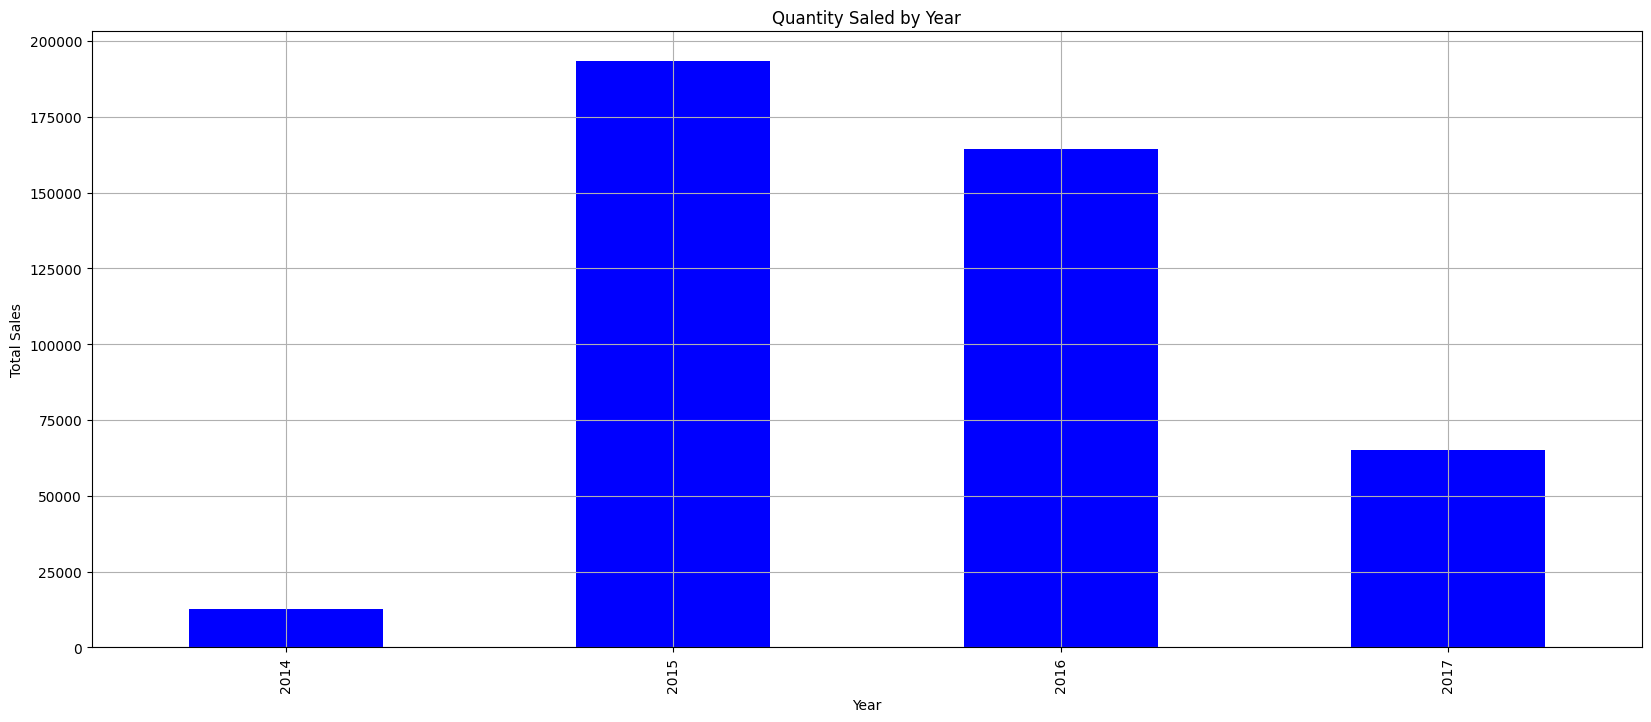

In [67]:
# Create a bar plot of sales by retail week
plt.figure(figsize=(20, 8))
sales_by_year.plot(kind='bar', color='blue')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Quantity Saled by Year')
plt.grid(True)
plt.show()

In [42]:
sales_by_month=df.groupby('month')['sales'].sum()
print(sales_by_month)

month
01    92045
02    63327
03    44019
04     3702
05     1857
06    19088
07    74865
08    66234
09    21981
10     3904
11     1718
12    42960
Name: sales, dtype: int64


## What is the month that has best Sales ?

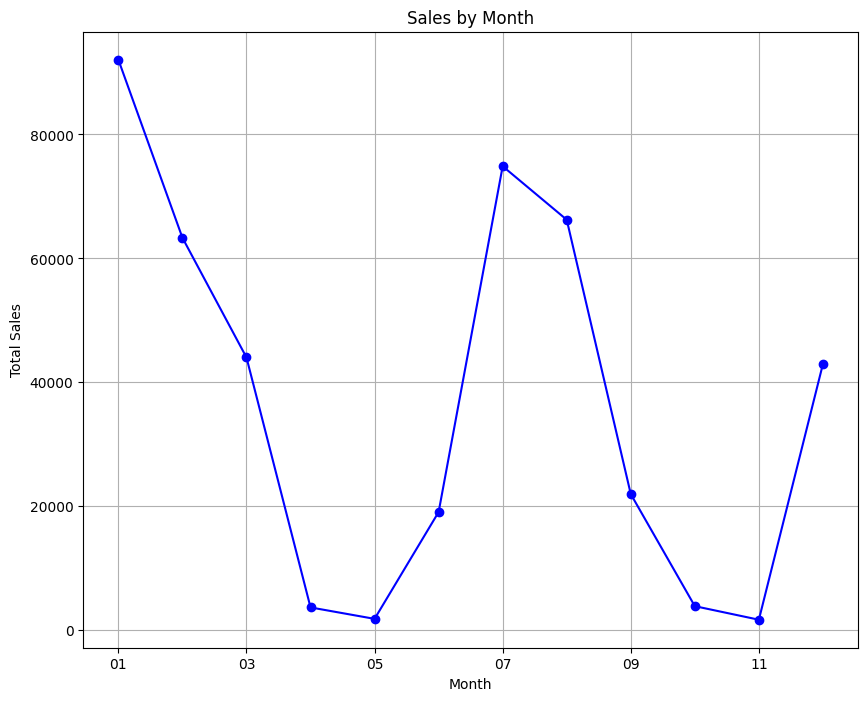

In [43]:
# Create a bar plot of sales by retail week
plt.figure(figsize=(10, 8))
sales_by_month.plot(kind='line', marker='o', linestyle='-',color='blue')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Sales by Month')
plt.grid(True)
plt.show()

## What is the year that has best and worst advertisement result ?

In [39]:
filtered_df = df[df['label'] == 1]

In [40]:
sales_by_year=filtered_df.groupby('year')['sales'].sum()
print(sales_by_year)

year
2014     12819
2015    193457
2016    164304
2017     65120
Name: sales, dtype: int64


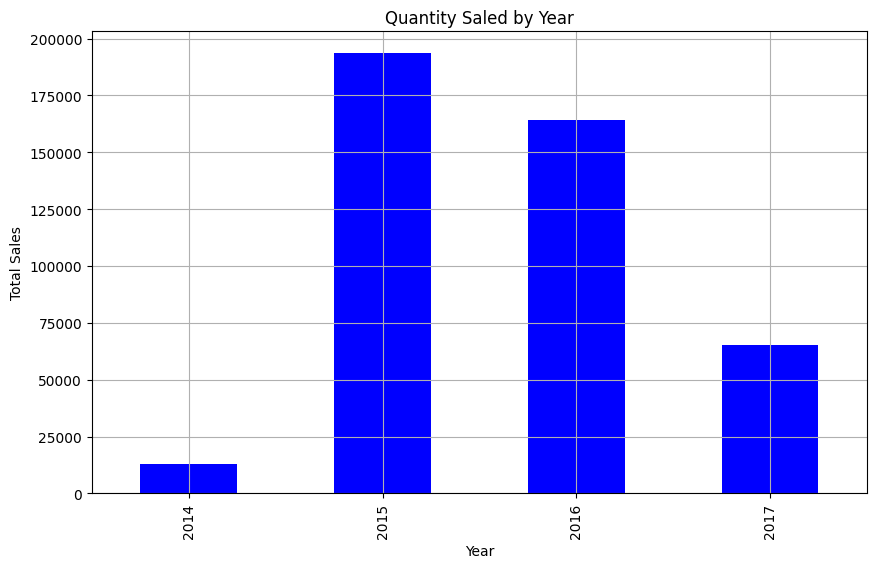

In [41]:
# Create a bar plot of sales by retail week
plt.figure(figsize=(10, 6))
sales_by_year.plot(kind='bar', color='blue')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Quantity Saled by Year')
plt.grid(True)
plt.show()

## Which gender responds to the advertisements the most?

In [44]:
sales_by_gender=filtered_df.groupby('gender')['sales'].sum()
print(sales_by_gender)

gender
kids       43457
men        40409
unisex     47128
women     304706
Name: sales, dtype: int64


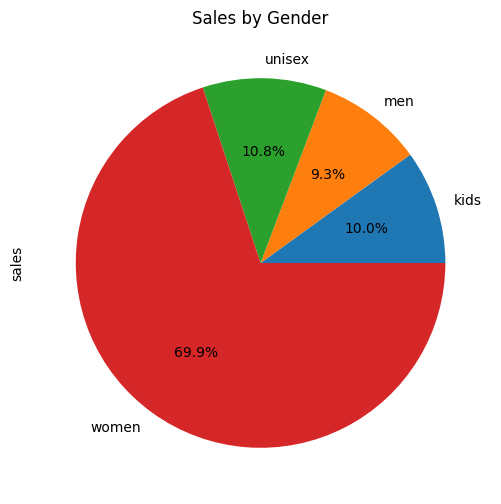

In [45]:
# Create a bar plot of sales by retail week
plt.figure(figsize=(10, 6))
sales_by_gender.plot(kind='pie',autopct='%1.1f%%')

plt.title('Sales by Gender')
plt.grid(True)
plt.show()

## What is the most Product sold ?

In [46]:
sales_by_productgroup=df.groupby('productgroup')['sales'].sum()
print(sales_by_productgroup)

productgroup
HARDWARE ACCESSORIES     89844
SHOES                   260675
SHORTS                   42405
SWEATSHIRTS              42776
Name: sales, dtype: int64


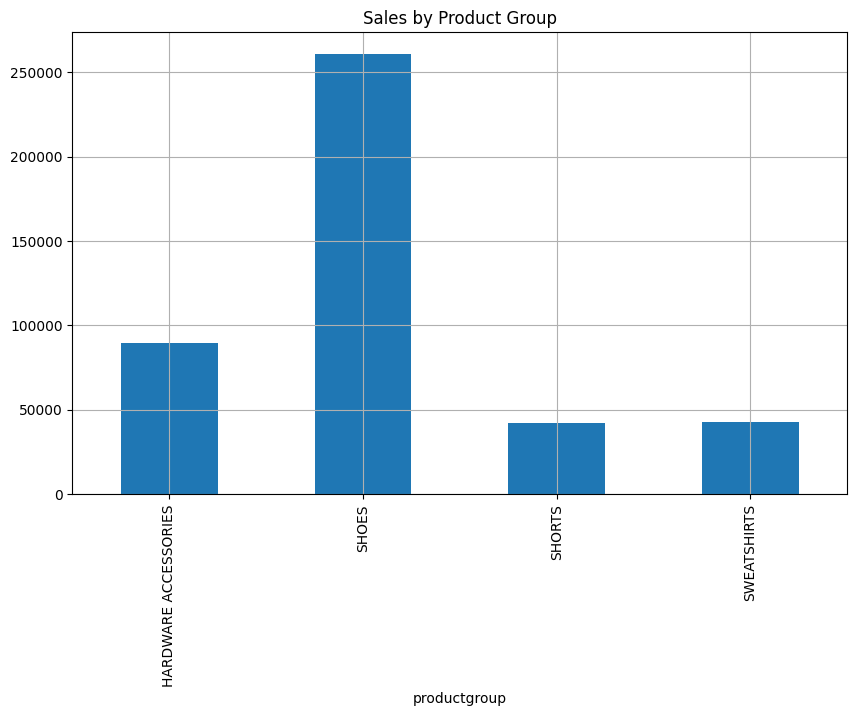

In [47]:
# Create a bar plot of sales by retail week
plt.figure(figsize=(10, 6))
sales_by_productgroup.plot(kind='bar')

plt.title('Sales by Product Group')
plt.grid(True)
plt.show()

## What is the impact of discouts activities  on sales?


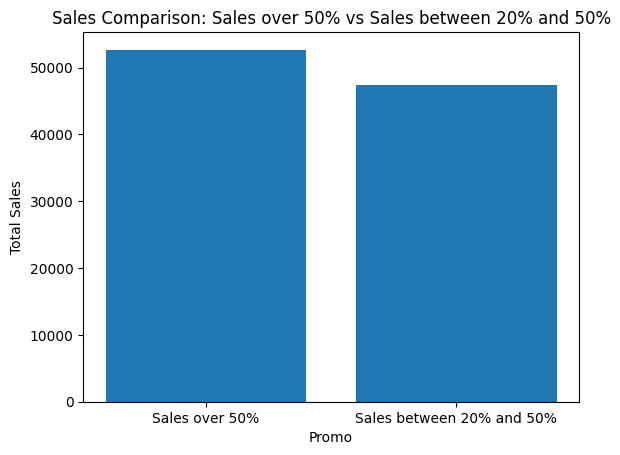

In [103]:
df_ratio_over_50 = df['ratio'].where(df['ratio'] > 0.5)
count_ratio_over_50 = df_ratio_over_50.count()

df_ratio_over_20 = df['ratio'].where((df['ratio'] > 0.2) & (df['ratio'] < 0.5))
count_ratio_over_20 = df_ratio_over_20.count()

# Create a bar plot
labels = ['Sales over 50%', 'Sales between 20% and 50%']
values = [count_ratio_over_50, count_ratio_over_20]

plt.bar(labels, values)
plt.xlabel('Promo')
plt.ylabel('Total Sales')
plt.title('Sales Comparison: Sales over 50% vs Sales between 20% and 50%')

# Display the plot
plt.show()


# What is the impact of promotional activities (promo1 and promo2) on sales?






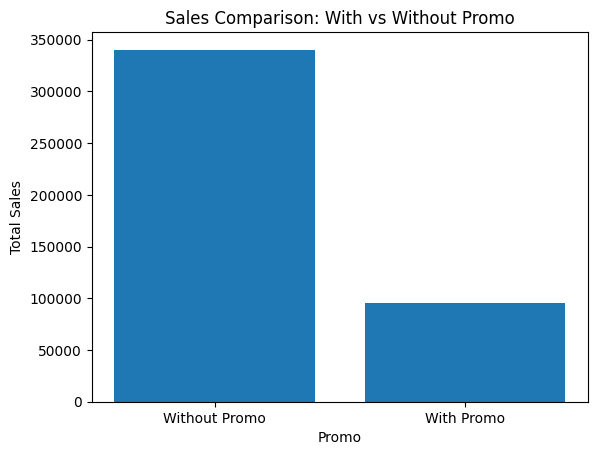

In [81]:
saleswithoutpromo = filtered_df[(filtered_df['promo1'] == 0) & (filtered_df['promo2'] == 0)]
saleswithpromo = filtered_df[(filtered_df['promo1'] == 1) | (filtered_df['promo2'] == 1)]

# Create a bar plot
labels = ['Without Promo', 'With Promo']
values = [saleswithoutpromo['sales'].sum(), saleswithpromo['sales'].sum()]

plt.bar(labels, values)
plt.xlabel('Promo')
plt.ylabel('Total Sales')
plt.title('Sales Comparison: With vs Without Promo')

# Display the plot
plt.show()


In [78]:
promo = filtered_df[(filtered_df['promo1'] == 1) | (filtered_df['promo2'] == 1)]
promo=promo.groupby('productgroup')['sales'].sum()

promo.head()

productgroup
HARDWARE ACCESSORIES    19599
SHOES                   57371
SHORTS                   9843
SWEATSHIRTS              8506
Name: sales, dtype: int64

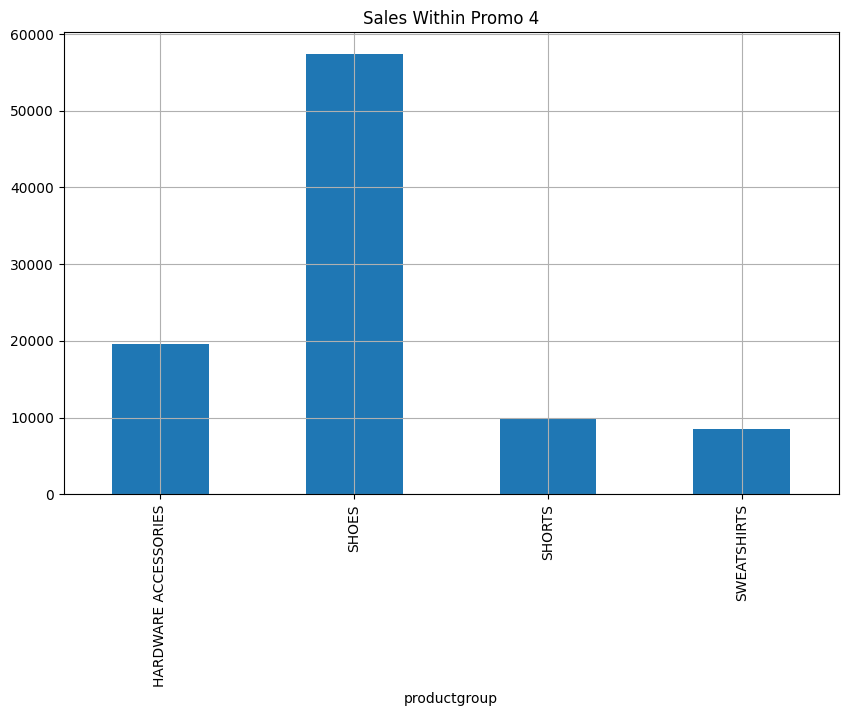

In [74]:
# Create a bar plot of sales by retail week
plt.figure(figsize=(10, 6))
promo.plot(kind='bar')

plt.title('Sales Within Promo')
plt.grid(True)
plt.show()



In [50]:
withoutpromo = filtered_df[(filtered_df['promo1'] == 0) & (filtered_df['promo2'] == 0)]
withoutpromo=withoutpromo.groupby('productgroup')['sales'].sum()

promo.head()

productgroup
HARDWARE ACCESSORIES    19599
SHOES                   57371
SHORTS                   9843
SWEATSHIRTS              8506
Name: sales, dtype: int64

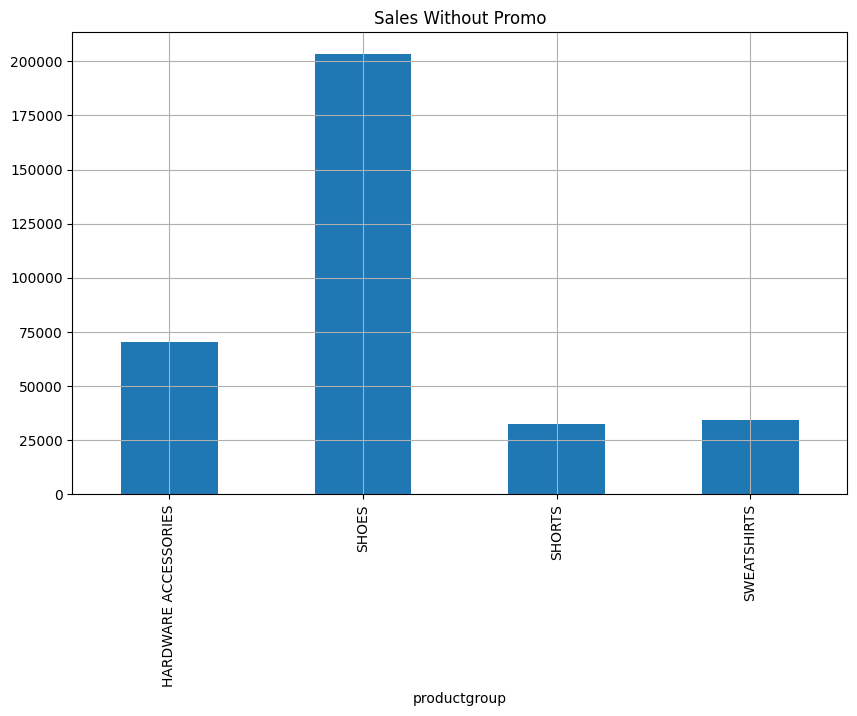

In [51]:
# Create a bar plot of sales by retail week
plt.figure(figsize=(10, 6))
withoutpromo.plot(kind='bar')

plt.title('Sales Without Promo')
plt.grid(True)
plt.show()

In [52]:
sales_by_style=df.groupby('style')['sales'].sum()
print(sales_by_style)

style
regular    214204
slim        89683
wide       131813
Name: sales, dtype: int64


## What is the most Style sold ?







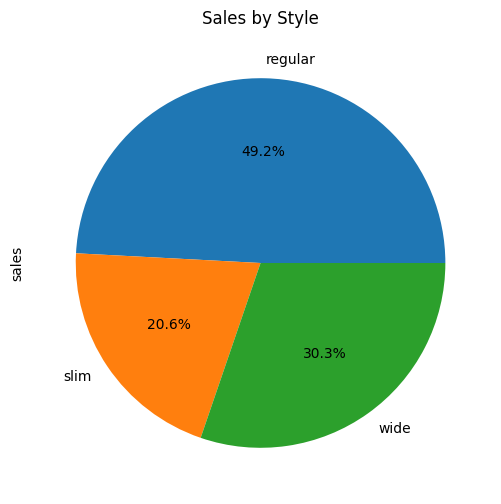

In [53]:
# Create a bar plot of sales by retail week
plt.figure(figsize=(10, 6))
sales_by_style.plot(kind='pie',autopct='%1.1f%%')

plt.title('Sales by Style')
plt.grid(True)
plt.show()

## What is the most category required ?

In [54]:
sales_by_category=df.groupby('category')['sales'].sum()
print(sales_by_category)

category
FOOTBALL GENERIC     87537
GOLF                 43827
INDOOR               41909
RELAX CASUAL         44106
RUNNING              89474
TRAINING            128847
Name: sales, dtype: int64


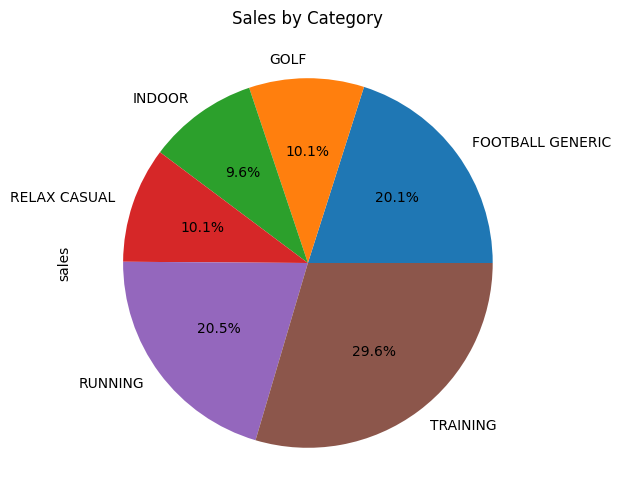

In [55]:
# Create a bar plot of sales by retail week
plt.figure(figsize=(10, 6))
sales_by_category.plot(kind='pie',autopct='%1.1f%%')

plt.title('Sales by Category')
plt.grid(True)
plt.show()

## What Products are often most sold together?

In [56]:
# Group the data by 'customer_id' and 'article' and calculate the count of unique articles
grouped_df = filtered_df.groupby('customer_id')['productgroup'].agg([('products', lambda x: ','.join(x)), ('count', 'count')]).reset_index()

# Print the resulting grouped DataFrame
grouped_df=grouped_df[grouped_df['count']>1]
grouped_df=grouped_df.sort_values('count')

grouped_df.head()

,customer_id,products,count
1504,2514.0,"SHOES,HARDWARE ACCESSORIES",2
1802,3530.0,"SWEATSHIRTS,SHOES",2
1796,3505.0,"HARDWARE ACCESSORIES,SHOES",2
548,803.0,"SHOES,SHOES",2
1795,3500.0,"SHOES,HARDWARE ACCESSORIES",2


In [57]:
# Group the data by desired features and calculate the revenue
revenue_table = df.groupby(['productgroup', 'category', 'retailweek']).agg({'sales': 'sum', 'cost': 'sum', 'current_price': 'mean'})
revenue_table = revenue_table.rename(columns={'sales': 'total_sales', 'cost': 'total_cost', 'current_price': 'average_price'})

# Add additional calculated columns
revenue_table['revenue'] = revenue_table['total_sales'] * revenue_table['average_price']
revenue_table['profit'] = revenue_table['revenue'] - revenue_table['total_cost']

# Display the revenue table
print(revenue_table)

                                          total_sales  total_cost  \
productgroup         category retailweek                            
HARDWARE ACCESSORIES GOLF     2014-12-28         7801       132.6   
                              2015-01-04         3024       142.8   
                              2015-01-11         2326       141.1   
                              2015-01-18         2878       153.0   
                              2015-01-25         4089       151.3   
...                                               ...         ...   
SWEATSHIRTS          TRAINING 2017-04-02         6430       357.0   
                              2017-04-09         5657       340.2   
                              2017-04-16         6840       357.0   
                              2017-04-23         7312       369.6   
                              2017-04-30         5682       348.6   

                                          average_price        revenue  \
productgroup         categor

In [61]:
# Checking unique values

column_values = df["country"].values
unique_values =  np.unique(column_values)
print(unique_values)

['Austria' 'France' 'Germany']


<ipython-input-63-9b98343f945e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


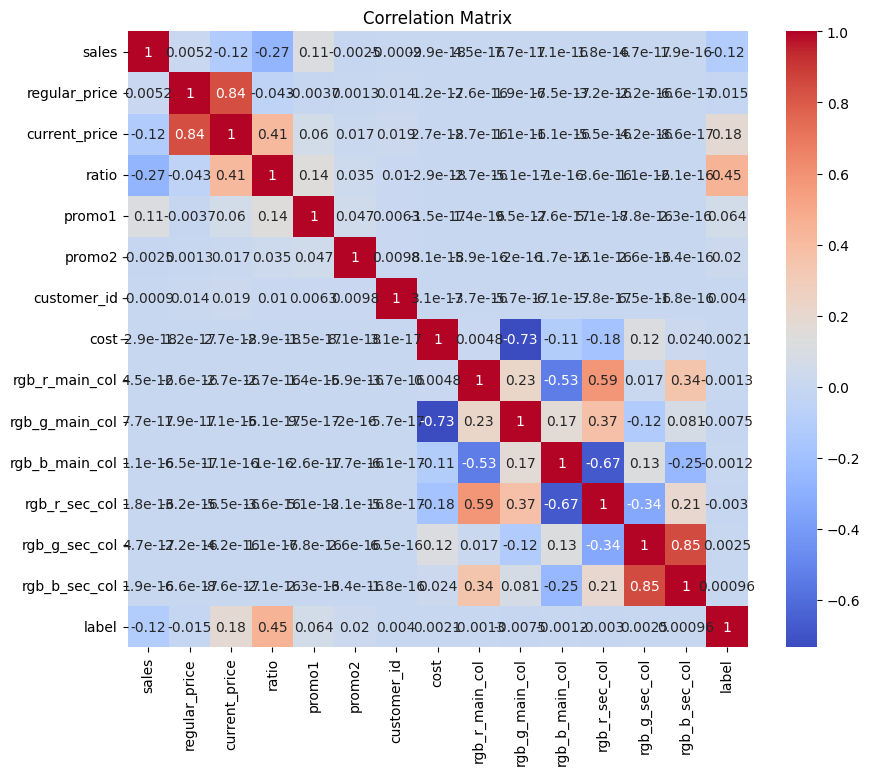

In [63]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [128]:
"""
# get the dummies and store it in a variable
dummies_category = pd.get_dummies(df.category,prefix='category')
# get the dummies and store it in a variable
dummies_productgroup = pd.get_dummies(df.productgroup,prefix='productgroup')
# get the dummies and store it in a variable
dummies_style = pd.get_dummies(df.style,prefix='style')

# Concatenate the dummies to original dataframe
merged_df = pd.concat([df, dummies_category,dummies_productgroup,dummies_style], axis='columns')

"""

In [148]:
import numpy as np
#print(np.unique(df.category))
#print(np.unique(df.productgroup))
#print(np.unique(df.style))
print(np.unique(df.gender))

['kids' 'men' 'unisex' 'women']


In [146]:
df.category.replace(['FOOTBALL GENERIC','GOLF', 'INDOOR','RELAX CASUAL','RUNNING','TRAINING'],
                        [0, 1,2,3,4,5], inplace=True)

In [140]:
df.productgroup.replace(['HARDWARE ACCESSORIES','SHOES', 'SHORTS','SWEATSHIRTS'],
                        [0, 1,2,3], inplace=True)

In [151]:
df.gender.replace(['kids','men', 'unisex','women'],
                        [0, 1,2,3], inplace=True)

In [129]:
df['month']=df['month'].astype('int')

In [187]:
# Select relevant features for the analysis
features = ['category','cost','productgroup','ratio','regular_price', 'current_price', 'promo1', 'promo2','gender','rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col','month']
target = 'label'



In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         100000 non-null  object 
 1   article         100000 non-null  object 
 2   sales           100000 non-null  int64  
 3   regular_price   100000 non-null  float64
 4   current_price   100000 non-null  float64
 5   ratio           100000 non-null  float64
 6   retailweek      100000 non-null  object 
 7   promo1          100000 non-null  int64  
 8   promo2          100000 non-null  int64  
 9   customer_id     100000 non-null  float64
 10  article.1       100000 non-null  object 
 11  productgroup    100000 non-null  int64  
 12  category        100000 non-null  object 
 13  cost            100000 non-null  float64
 14  style           100000 non-null  object 
 15  sizes           100000 non-null  object 
 16  gender          100000 non-null  object 
 17  rgb_r_main_

In [188]:
from sklearn.preprocessing import MinMaxScaler

# Assuming you have a DataFrame called 'df' containing the 'regular_price' and 'current_price' columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the columns to be normalized
columns_to_normalize = ['regular_price','ratio', 'current_price','cost','rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col','month']

# Apply Min-Max scaling to the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [205]:
# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [209]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8531


In [198]:
# Split the dataset into majority and minority classes
majority_class = df[df['label'] == 0]
minority_class = df[df['label'] == 1]


In [199]:
# Undersample the majority class
undersampled_majority = majority_class.sample(n=len(minority_class), random_state=42)

In [200]:
# Combine the undersampled majority class with the minority class
balanced_df = pd.concat([undersampled_majority, minority_class])

In [203]:
# Split the data into training and testing sets
X = balanced_df[features]
y = balanced_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [204]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7848169418521177


In [191]:
from sklearn.inspection import permutation_importance

# Assuming you have a trained model called 'model'
results = permutation_importance(model, X, y, scoring='accuracy')
importances = results.importances_mean


In [206]:
# Assuming you have calculated the feature importances and stored them in the 'importances' variable
# Assuming you have a list of feature names called 'feature_names'

# Sort the feature importances and feature names in descending order
"""
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = [features[i] for i in sorted_indices]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()
"""

"\nsorted_indices = importances.argsort()[::-1]\nsorted_importances = importances[sorted_indices]\nsorted_feature_names = [features[i] for i in sorted_indices]\n\n# Create a bar plot of feature importances\nplt.figure(figsize=(10, 6))\nplt.bar(range(len(sorted_importances)), sorted_importances)\nplt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation='vertical')\nplt.xlabel('Feature')\nplt.ylabel('Importance')\nplt.title('Feature Importance')\nplt.show()\n"

In [155]:
from sklearn.metrics import classification_report

# Assuming you have actual labels in 'y_true' and predicted labels in 'y_pred'
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.87      0.98      0.92     17189
           1       0.41      0.10      0.16      2811

    accuracy                           0.85     20000
   macro avg       0.64      0.54      0.54     20000
weighted avg       0.80      0.85      0.81     20000



## Conclusion : The Most Answered Question


1. What is  the year that has the best and worst sales ?
2. What is the month that has best Sales?
3. What is the year that has best and worst advertisement result ?
4. What is the most gender interested in our products?
5. Which gender responds to the advertisements the most?
6. What is the most country interested in our products?
7. What is the impact of promotional activities (promo1 and promo2) on sales?
8. What is the impact of discount activities 20% or 50% on sales?
9. What is the most Product sold ?
10. What is the most category required ?
11. What is the most Style sold ?
12. What Products are often most sold together?



